<a href="https://colab.research.google.com/github/rpdahxn/HandsOnML/blob/main/09_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

설정

In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


## 9.1 군집

In [2]:
# 군집(비지도 학습) vs 분류(지도 학습)
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

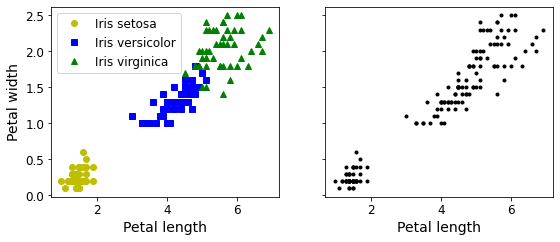

In [4]:
plt.figure(figsize = (9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize = 14)
plt.ylabel("Petal width", fontsize = 14)
plt.legend(fontsize = 12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c = "k", marker = ".")
plt.xlabel("Petal length", fontsize = 14)
plt.tick_params(labelleft = False)

plt.show()

In [5]:
# 가우시안 혼합 모델은 3개의 클러스터를 잘 나눌 수 있다.
from sklearn.mixture import GaussianMixture

In [6]:
y_pred = GaussianMixture(n_components = 3, random_state = 42).fit(X).predict(X)

In [7]:
# 각 클러스터를 하나의 클래스에 매핑해 본다.
# 이 매핑을 하드 코딩하는 대신 각 클러스터에서 가장 많은 클래스를 선택한다.
from scipy import stats

mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode[0]] = class_id

mapping

{0: 2, 1: 0, 2: 1}

In [8]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

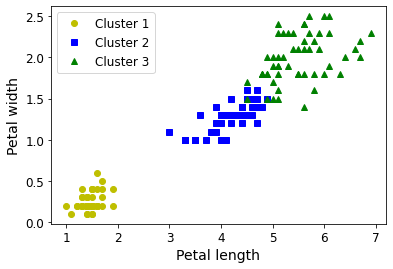

In [9]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label = "Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label = "Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label = "Cluster 3")
plt.xlabel("Petal length", fontsize = 14)
plt.ylabel("Petal width", fontsize = 14)
plt.legend(loc = "upper left", fontsize = 12)

plt.show()

### 9.1.1 k-평균

In [10]:
# 우선 예제 데이터를 생성한다.
from sklearn.datasets import make_blobs

In [11]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [12]:
X, y = make_blobs(n_samples = 2000, centers = blob_centers, cluster_std = blob_std, random_state = 7)

In [13]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

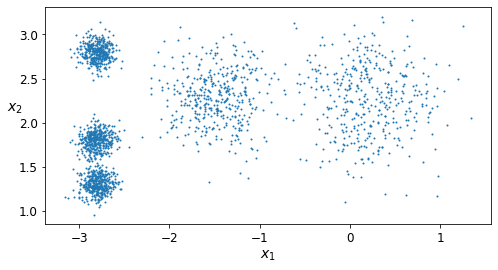

In [14]:
plt.figure(figsize=(8, 4))
plot_clusters(X)

plt.show()

In [15]:
# 이 데이터셋에 k-평균 군집 알고리즘을 훈련해 본다.
# 이 알고리즘은 클러스터 중심을 찾고 각 샘플을 가까운 클러스터에 할당한다.
from sklearn.cluster import KMeans

In [16]:
k = 5  # 알고리즘이 찾을 클러스터 개수
kmeans = KMeans(n_clusters = k, random_state = 42)
y_pred = kmeans.fit_predict(X)

각 샘플은 5개의 클러스터 중 하나에 할당된다.

In [17]:
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [18]:
y_pred is kmeans.labels_

True

In [19]:
# 알고리즘이 찾은 5개의 센트로이드
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [20]:
# KMeans 객체는 훈련한 샘플의 레이블을 가지고 있다.
# 여기에서 샘플의 레이블은 샘플에 할당한 클러스터의 인덱스
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [21]:
# 새로운 샘플의 레이블 예측하기
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

In [22]:
# 이 모델의 결정 경계를 그려 본다.
# 이 그림은 보로노이 다이어그램 이 된다.
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12, 
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

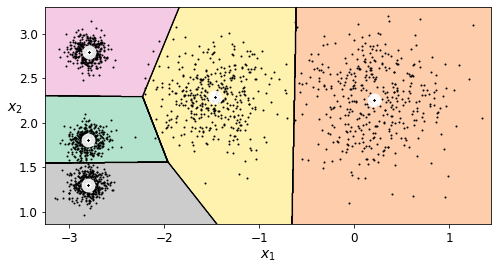

In [23]:
plt.figure(figsize = (8, 4))
plot_decision_boundaries(kmeans, X)

plt.show()

하드 군집 vs 소프트 군집

In [24]:
# 하드 군집은 각 샘플에 대해 가장 가까운 클러스터를 선택한다.
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

즉 X_new의 첫 번째 샘플이 첫 번째 센트로이드에서 2.81, 두 번째 센트로이드에서 0.33 만큼 떨어져 있음을 의미한다.  

In [25]:
# 위에서 구한 거리가 샘플과 센트로이드 사이의 유클리드 거리인지 확인할 수 있다.
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

#### k-평균 알고리즘

In [26]:
# k-평균 알고리즘을 1, 2, 3회 반복하고 센트로이드가 어떻게 움직이는지 확인해 본다.
kmeans_iter1 = KMeans(n_clusters = 5, init = "random", n_init = 1,
                    algorithm = "full", max_iter = 1, random_state = 0)
kmeans_iter2 = KMeans(n_clusters = 5, init = "random", n_init = 1,
                    algorithm = "full", max_iter = 2, random_state = 0)
kmeans_iter3 = KMeans(n_clusters = 5, init = "random", n_init = 1,
                    algorithm = "full", max_iter = 3, random_state = 0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=0)

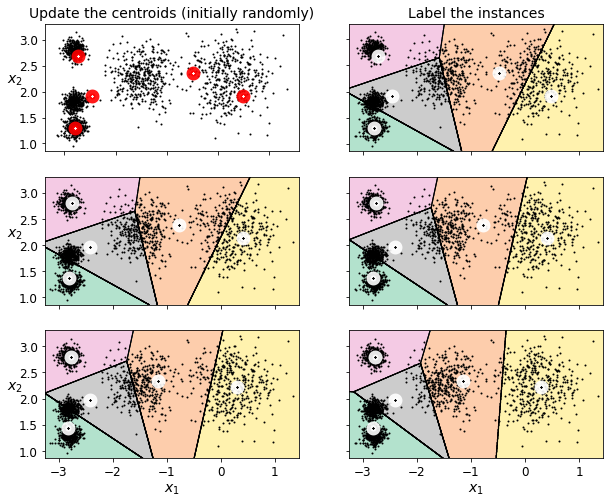

In [27]:
# 그래프를 그려본다.
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

**k평균의 변동성**

In [30]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1 = None, title2= None):
  clusterer1.fit(X)
  clusterer2.fit(X)

  plt.figure(figsize = (10, 3.2))

  plt.subplot(121)
  plot_decision_boundaries(clusterer1, X)
  if title1:
    plt.title(title1, fontsize = 14)

  plt.subplot(122)
  plot_decision_boundaries(clusterer2, X, show_ylabels = False)
  if title2:
    plt.title(title2, fontsize = 14)

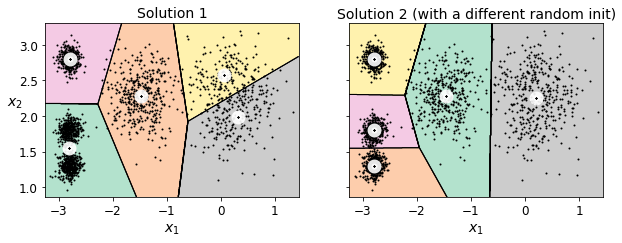

In [31]:
kmeans_rnd_init1 = KMeans(n_clusters = 5, init = "random", n_init= 1,
                          algorithm = "full", random_state = 2)
kmeans_rnd_init2 = KMeans(n_clusters = 5, init = "random", n_init = 1,
                          algorithm = "full", random_state = 5)
plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")
plt.show()

#### 이너셔  
k-평균 모델의 성능을 평가하는 방법.  
각 샘플과 센트로이드 사이의 거리를 측정해 준다.

In [32]:
kmeans.inertia_

211.5985372581684

In [34]:
# 이너셔는 각 훈련 샘플과 가장 가까운 센트로이드 사이의 제곱 거리의 합으로 쉽게 검증할 수 있다.
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816868

In [35]:
kmeans.score(X)

-211.59853725816836

score()메서드는 음의 이너셔를 반환한다.  
이너셔는 작은 값이 좋은 것이고, score의 경우에는 큰 값이 좋은 것이기 때문.  
**다중 초기화**  
변동성 이슈를 해결하는 한 방법은 단순히 k-평균 알고리즘을 랜덤 초기화를 다르게 하여 여러 번 실행하고 가장 작은 이너셔를 만드는 솔루션을 선택하는 것이다. 

In [36]:
kmeans_rnd_init1.inertia_

219.43539442771396

In [37]:
kmeans_rnd_init2.inertia_

211.5985372581684

In [38]:
# 알고리즘을 n_init번 실행하고 이너셔가 가장 작은 솔루션을 선택한다.
# 기본값은 10
kmeans_rnd_10_inits = KMeans(n_clusters = 5, init= "random", n_init = 10,
                             algorithm = "full", random_state = 2)
kmeans_rnd_10_inits.fit(X)

KMeans(algorithm='full', init='random', n_clusters=5, random_state=2)

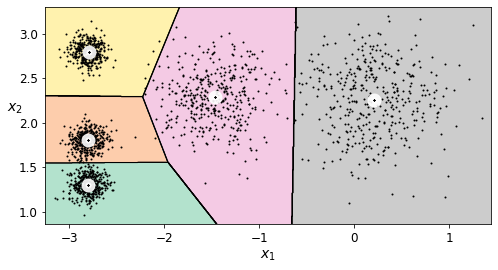

In [39]:
plt.figure(figsize = (8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

#### 센트로이드 초기화 방법

In [40]:
KMeans()

KMeans()

In [41]:
good_init= np.array([[-3,3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])  # 센트로이드 리스트
kmeans = KMeans(n_clusters = 5, init = good_init, n_init = 1, random_state = 42)
kmeans.fit(X)
kmeans.inertia_


211.5985372581684

#### k-평균 속도 개선

In [42]:
%timeit -n 50 KMeans(algorithm="elkan", random_state=42).fit(X)

The slowest run took 4.10 times longer than the fastest. This could mean that an intermediate result is being cached.
50 loops, best of 5: 90 ms per loop


In [43]:
%timeit -n 50 KMeans(algorithm="full", random_state=42).fit(X)

50 loops, best of 5: 119 ms per loop


데이터셋이 작아서 현재는 큰 차이가 없다.  
#### 미니배치 k-평균

In [44]:
from sklearn.cluster import MiniBatchKMeans

In [45]:
minibatch_kmeans = MiniBatchKMeans(n_clusters = 5, random_state = 42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

In [46]:
minibatch_kmeans.inertia_

211.65239850433215

데이터셋이 메모리에 다 들어가지 못한다면 memmap 클래스를 사용한다.

In [47]:
import urllib.request
from sklearn.datasets import fetch_openml 

mnist = fetch_openml('mnist_784', version = 1)
mnist.target = mnist.target.astype(np.int64)

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist["data"], mnist["target"], random_state = 42)

memmap에 데이터를 기록한다. 

In [49]:
filename = "my_mnist.data"
X_mm = np.memmap(filename, dtype = "float32", mode = 'write', shape = X_train.shape)
X_mm[:] = X_train

In [50]:
minibatch_kmeans = MiniBatchKMeans(n_clusters = 10, batch_size = 10, random_state = 42)
minibatch_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=10, n_clusters=10, random_state=42)

In [51]:
# 배치를 로드하는 함수
def load_next_batch(batch_size):
  return X[np.random.choice(len(X), batch_size, replace = True)]

In [52]:
np.random.seed(42)

In [58]:
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500 
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [59]:
best_kmeans.score(X)

-211.7113193634467

In [60]:
%timeit KMeans(n_clusters = 5, random_state = 42).fit(X)

10 loops, best of 5: 87 ms per loop


In [61]:
%timeit MiniBatchKMeans(n_clusters = 5, random_state = 42).fit(X)

The slowest run took 4.79 times longer than the fastest. This could mean that an intermediate result is being cached.
100 loops, best of 5: 15.1 ms per loop


미니배치 k-평균이 일반 k-평균보다 훨씬 빠르지만 성능은 낮은 경우가 많다.  
k가 증가할수록 더 그렇다.

In [62]:
from timeit import timeit

In [66]:
times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

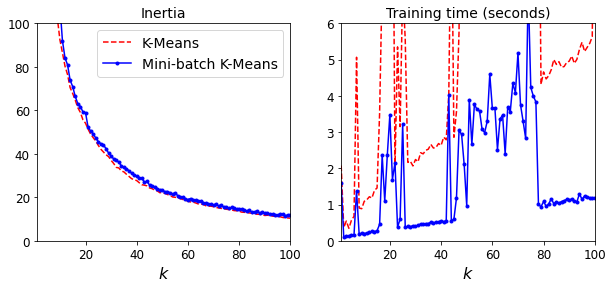

In [67]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])

plt.show()

#### 최적의 클러스터 개수 찾기

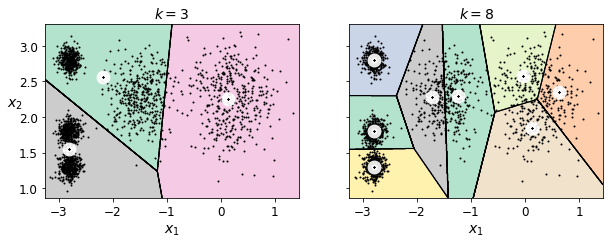

In [68]:
kmeans_k3 = KMeans(n_clusters = 3, random_state = 42)
kmeans_k8 = KMeans(n_clusters = 8, random_state = 42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")

plt.show()

두 모델 모두 좋아 보이지는 않는다.

In [69]:
kmeans_k3.inertia_

653.216719002155

In [70]:
kmeans_k8.inertia_

119.11983416102879

In [71]:
kmeans_per_k = [KMeans(n_clusters=k, random_state = 42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

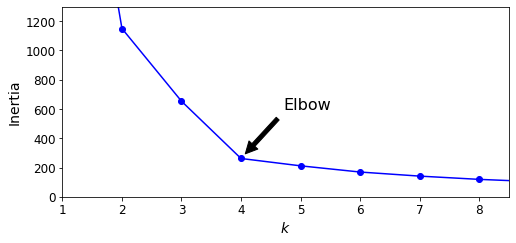

In [73]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
plt.show()

k=4에서 엘보우가 있다.  
이 값보다 클러스터가 작으면 나쁘다는 뜻이다.  

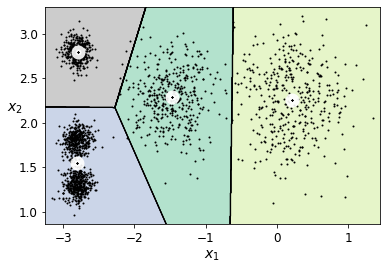

In [74]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

k에 대한 실루엣 점수를 그래프로 그려본다.

In [75]:
from sklearn.metrics import silhouette_score

In [76]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [77]:
silhouette_scores = [silhouette_score(X, model.labels_)
                    for model in kmeans_per_k[1:]]

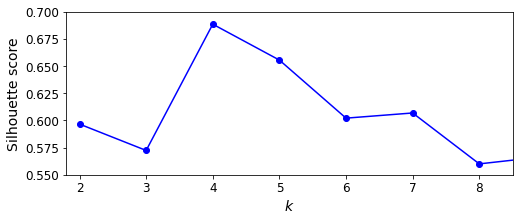

In [78]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])

plt.show()

모든 샘플의 실루엣 계수를 할당된 클러스터와 실루엣 값으로 정렬하여 그리면 훨씬 많은 정보를 얻을 수 있다.  
이를 실루엣 다이어그램이라고 한다.  

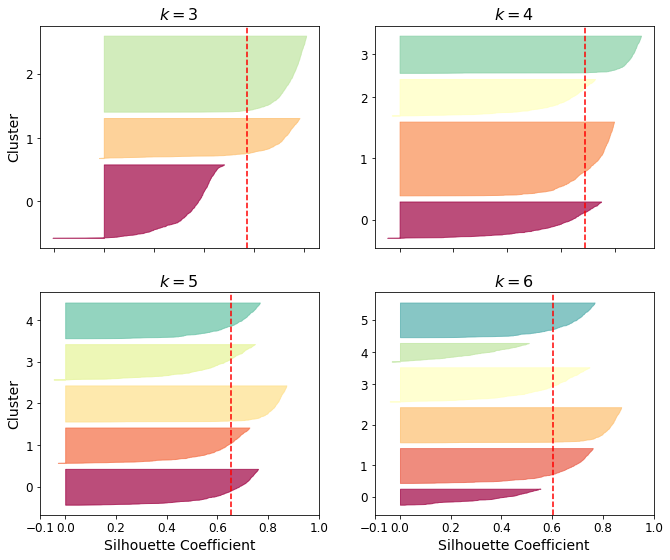

In [79]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

### 9.1.2 k-평균의 한계

In [80]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

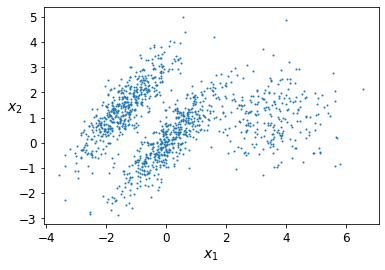

In [81]:
plot_clusters(X)

In [82]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

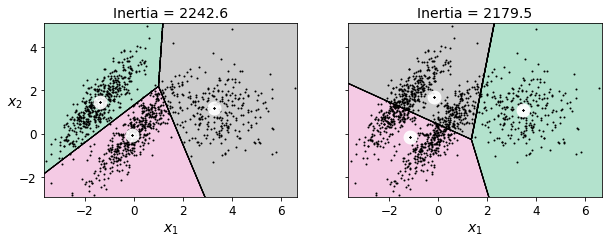

In [83]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

### 9.1.3 군집을 사용한 이미지 분할

In [85]:
# 무당벌레 이미지 다운로드
images_path = os.path.join('/content/drive/MyDrive/Colab Notebooks', "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('/content/drive/MyDrive/Colab Notebooks/images/unsupervised_learning/ladybug.png',
 <http.client.HTTPMessage at 0x7fe6d248cb90>)

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [86]:
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

In [87]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [88]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

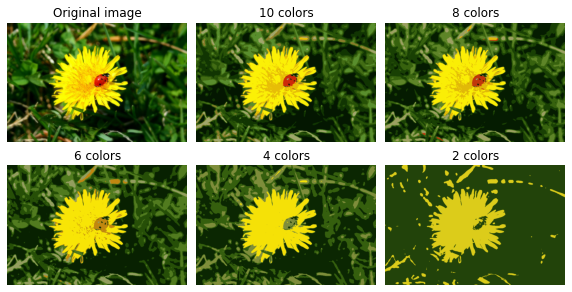

In [89]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

### 9.1.3 군집을 사용한 전처리

In [90]:
from sklearn.datasets import load_digits

In [91]:
X_digits, y_digits = load_digits(return_X_y=True)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

In [93]:
from sklearn.linear_model import LogisticRegression

In [94]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [95]:
log_reg_score = log_reg.score(X_test, y_test)
log_reg_score

0.9688888888888889

기본 모델의 정확도는 96.89%다.  
k-평균을 전처리 단계로 사용해 더 향상할 수 있는지 살펴본다.  
훈련 세트를 50개의 클러스터로 만들고 이미지를 이 클러스터까지 거리고 바꾼 다음 로지스틱 회귀 모델을 적용하는 파이프라인을 만든다.

In [96]:
from sklearn.pipeline import Pipeline

In [97]:
pipeline = Pipeline([
          ("kmeans", KMeans(n_clusters = 50, random_state = 42)),
          ("log_reg", LogisticRegression(multi_class = "ovr", solver = "lbfgs", max_iter = 5000, random_state = 42)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [98]:
pipeline_score = pipeline.score(X_test, y_test)
pipeline_score

0.9777777777777777

In [99]:
1- (1- pipeline_score) / (1 - log_reg_score)

0.28571428571428414

오차율이 줄었다. 하지만 위에서는 클러스터 개수 k를 임의로 결정했다.  
교차 검증에서 가장 좋은 분류 성능을 내는 k값을 찾는다.

In [100]:
from sklearn.model_selection import GridSearchCV

In [102]:
param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   1.8s
[CV] END ...............................kmeans__n_clusters=2; total time=   1.5s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.8s
[CV] END ...............................kmeans__n_clusters=3; total time=   1.5s
[CV] END ...............................kmeans__n_clusters=3; total time=   1.3s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.5s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.8s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.7s
[CV] END ...............................kmeans__n_clusters=4; total time=   1.2s
[CV] END ...............................kmeans__n_clusters=5; total time=   1.9s
[CV] END ...............................kmeans__n_clusters=5; total time=   1.2s
[CV] END ...............................kmeans_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ..............................kmeans__n_clusters=55; total time=  10.3s
[CV] END ..............................kmeans__n_clusters=56; total time=   7.6s
[CV] END ..............................kmeans__n_clusters=56; total time=   7.2s
[CV] END ..............................kmeans__n_clusters=56; total time=   7.9s
[CV] END ..............................kmeans__n_clusters=57; total time=   7.9s
[CV] END ..............................kmeans__n_clusters=57; total time=   8.7s
[CV] END ..............................kmeans__n_clusters=57; total time=   7.4s
[CV] END ..............................kmeans__n_clusters=58; total time=   8.2s
[CV] END ..............................kmeans__n_clusters=58; total time=   9.2s
[CV] END ..............................kmeans__n_clusters=58; total time=   7.3s
[CV] END ..............................kmeans__n_clusters=59; total time=   8.3s
[CV] END ..............................kmeans__n_clusters=59; total time=   8.4s
[CV] END ...................

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [103]:
# 최적의 클러스터 개수를 확인한다.
grid_clf.best_params_

{'kmeans__n_clusters': 95}

In [104]:
grid_clf.score(X_test, y_test)

0.9777777777777777

### 9.1.5 군집을 사용한 준지도 학습  
준지도 학습 : 레이블이 없는 샘플이 많고 레이블이 있는 샘플이 적을 때  

In [105]:
n_labeled = 50

In [106]:
log_reg = LogisticRegression(multi_class = "ovr", solver = "lbfgs", random_state = 42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8333333333333334

전체 데이터셋을 사용했을 때보다 당연히 더 낮은 정확도가 나왔다.  
우선 훈련 세트를 50개의 클러스터로 모은다.  
그다음 각 클러스터에서 센트로이드에 가장 가까운 이미지(= 대표 이미지)를 찾는다.

In [107]:
k = 50

In [109]:
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

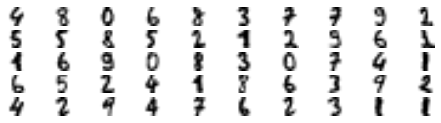

In [110]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [111]:
y_train[representative_digit_idx]

array([4, 8, 0, 6, 8, 3, 7, 7, 9, 2, 5, 5, 8, 5, 2, 1, 2, 9, 6, 1, 1, 6,
       9, 0, 8, 3, 0, 7, 4, 1, 6, 5, 2, 4, 1, 8, 6, 3, 9, 2, 4, 2, 9, 4,
       7, 6, 2, 3, 1, 1])

In [112]:
y_representative_digits = np.array([
    0, 1, 3, 2, 7, 6, 4, 6, 9, 5,
    1, 2, 9, 5, 2, 7, 8, 1, 8, 6,
    3, 1, 5, 4, 5, 4, 0, 3, 2, 6,
    1, 7, 7, 9, 1, 8, 6, 5, 4, 8,
    5, 3, 3, 6, 7, 9, 7, 8, 4, 9])

In [113]:
# 대표이미지로 모델을 학습시키고 성능이 더 나은지 확인한다.
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.09555555555555556

In [114]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [115]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [116]:
log_reg.score(X_test, y_test)

0.15333333333333332

In [117]:
# 레이블을 센트로이드에 가까운 75번째 백분위수까지 전파 
percentile_closest = 75

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [118]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [119]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [120]:
log_reg.score(X_test, y_test)

0.15777777777777777

In [121]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.19541375872382852

### DBSCAN

In [125]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 1000, noise = 0.05, random_state = 42)
dbscan = DBSCAN(eps = 0.05, min_samples = 5)
dbscan.fit(X, y)

DBSCAN(eps=0.05)

In [126]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [127]:
len(dbscan.core_sample_indices_)

808

In [128]:
# 핵심 샘플의 인덱스
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [129]:
# 핵심 샘플 자체
dbscan.components_[:3]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599]])

In [130]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [131]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [132]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

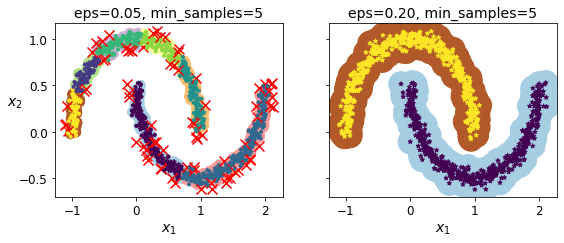

In [133]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

In [134]:
dbscan = dbscan2

In [135]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [136]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [137]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

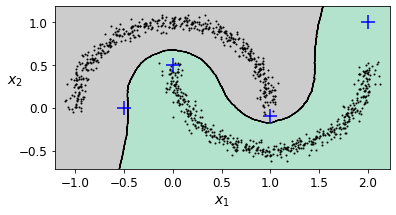

In [138]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)

plt.show()

In [139]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1])

### 9.1.7 다른 군집 알고리즘
**스펙트럼 군집**

In [140]:
from sklearn.cluster import SpectralClustering

sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)

SpectralClustering(gamma=100, n_clusters=2, random_state=42)

In [141]:
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

SpectralClustering(gamma=1, n_clusters=2, random_state=42)

In [142]:
np.percentile(sc1.affinity_matrix_, 95)

0.04251990648936265

In [143]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=14)

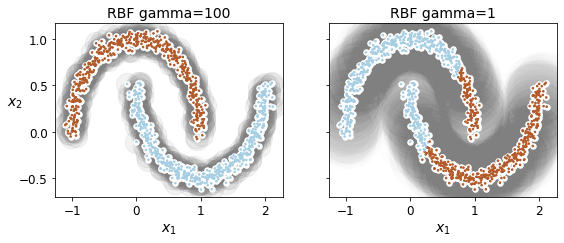

In [144]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)

plt.show()

**병합 군집**

In [145]:
from sklearn.cluster import AgglomerativeClustering

X = np.array([0, 2, 5, 8.5]).reshape(-1, 1)
agg = AgglomerativeClustering(linkage="complete").fit(X)

In [146]:
def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]

In [147]:
learned_parameters(agg)

['children_',
 'labels_',
 'n_clusters_',
 'n_connected_components_',
 'n_features_in_',
 'n_leaves_']

In [148]:
agg.children_

array([[0, 1],
       [2, 3],
       [4, 5]])